In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


read_file = open('co2a0000365.txt', 'r')

# for line in read_file:
# channels=[]
read_file.readline()
df = pd.DataFrame(columns=['user_id', 'alcoholic', 'paradigm','replication','Channel','Min','Max','Sd','Mean',
                           'Median','IQR','0.025','0.25','0.5','0.75','0.975'])

matriz =  np.matrix(np.empty(shape=(0,4)))
user = []
alcoholic=[]
paradigm=[]
replication=[]
channel=[]


for cont in range(100):
  
    firstline = read_file.readline().split("  ")
    lineeg=[]
    
    for i in range(len(firstline)-1):
        
        if i==0:
            user.append(float(firstline[i]))
        elif i==1:
            alcoholic.append(firstline[i])
             
        elif i==2:
            
            paradigm.append(firstline[i])
             
        if i==3:
            
            replication.append(float(firstline[i]))
        elif i>=4:
            if i==4:
                channelline=firstline[i].split(" ")
                channel.append(channelline[0])
                if channelline[1][0]=='c':
                    canal=channelline[1][1:]
                    lineeg.append(float(canal))

                else:
                    lineeg.append(float(channelline[1]))
           
            else:
                lineeg.append(float(firstline[i]))

   # matriz= np.insert(matriz,j,line,axis=0)
    datachannel = pd.DataFrame(lineeg)
    min = datachannel.min()
    max = datachannel.max()
    sd = datachannel.std()
    mean = datachannel.mean()
    quantil0=datachannel.quantile(.025)
    quantil1=datachannel.quantile(.25)
    median=datachannel.quantile(.5)
    quantil3=datachannel.quantile(.75)
    quantil4=datachannel.quantile(.975)
    iqr=quantil3[0]-quantil1[0]
    
    df.loc[cont]=[user[cont],alcoholic[cont],paradigm[cont],replication[cont],channel[cont],min[0],max[0],
                  sd[0],mean[0],median[0],iqr,quantil0[0],quantil1[0],median[0],quantil3[0],quantil4[0]]
 
   

    
print(df)

    


    user_id alcoholic    paradigm  replication Channel     Min      Max  \
0     365.0         a  S2matcherr          3.0     FP1 -34.302   10.620   
1     365.0         a  S2matcherr          3.0     FP2 -20.243   15.889   
2     365.0         a  S2matcherr          3.0      F7 -36.112    2.950   
3     365.0         a  S2matcherr          3.0      F8 -20.081    9.216   
4     365.0         a  S2matcherr          3.0     AF1 -20.477    9.308   
5     365.0         a  S2matcherr          3.0     AF2 -14.394   12.950   
6     365.0         a  S2matcherr          3.0      FZ -13.326    7.670   
7     365.0         a  S2matcherr          3.0      F4 -11.831   30.650   
8     365.0         a  S2matcherr          3.0      F3 -18.321    7.558   
9     365.0         a  S2matcherr          3.0     FC6  -8.382   12.126   
10    365.0         a  S2matcherr          3.0     FC5 -11.892    8.128   
11    365.0         a  S2matcherr          3.0     FC2  -5.707    3.571   
12    365.0         a  S2

## Separar columnes


In [93]:
from sklearn.preprocessing import StandardScaler

features =['Min','Max','Sd','Mean',
                           'Median','IQR','0.025','0.25','0.5','0.75','0.975']
# Separar les variables explicatives
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['alcoholic']].values
print(x)


# Standardizing the features
x = StandardScaler().fit_transform(x)


[[-34.302       10.62        11.71885367 ... -17.212       -4.517
    4.761     ]
 [-20.243       15.889        6.96224298 ...  -5.595        0.38625
    7.589     ]
 [-36.112        2.95        10.86367251 ... -16.581       -7.792
    0.325625  ]
 ...
 [-18.565       85.927       21.15750942 ...  -1.475        7.802
   79.823625  ]
 [ -5.442       44.362       10.21941502 ...   6.276       12.136
   38.808     ]
 [-16.469       31.382        8.36155743 ...  -2.309        2.085
   24.851625  ]]


## PCA

In [94]:

# mantenir dos components
pca = PCA(n_components=8)
# trasformar les variables explicatives
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2','component 3','component 4','component 5','component 1', 'component 2','component 3'])
principalDf

,component 1,component 2,component 3,component 4,component 5,component 1,component 2,component 3
0,-6.156021,5.321088,-0.737364,0.824659,-0.032794,0.048601,0.028594,-0.018150
1,-2.095326,1.276684,-0.138513,0.123749,0.081565,-0.033390,0.075347,-0.029056
2,-6.779639,5.234985,-0.492850,0.558409,-0.254645,-0.401363,-0.172923,-0.038857
3,-3.105597,1.152691,-0.485885,-0.132408,-0.018710,0.016918,0.062483,-0.024897
4,-2.538676,1.602142,-0.218224,0.363006,-0.049650,0.030084,-0.027101,0.028101
5,-0.668394,-0.402189,0.026727,-0.090736,0.096896,-0.112779,-0.051371,-0.055210
6,-1.264452,-0.277777,-0.307356,0.014793,0.007607,0.197504,-0.000896,0.005280
7,2.520241,1.431898,0.773004,2.242324,0.071563,0.400886,0.141360,0.091735
8,-1.999262,1.204884,-0.058697,0.551091,-0.174867,-0.214908,-0.124066,-0.010159
9,0.842251,-1.599616,0.292054,-0.113166,-0.065865,0.109509,0.004915,0.005624


## Drawing

In [95]:
pca.explained_variance_ratio_

array([5.69190549e-01, 3.41223229e-01, 6.72533452e-02, 1.81934138e-02,
       2.07235363e-03, 1.52074418e-03, 3.80550361e-04, 1.23976566e-04])

In [96]:
df_1 = pd.DataFrame(x, columns=features)

# data normalitzada
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df_1),columns = df_1.columns) 

# PCA
pca = PCA(n_components=8)
pca.fit_transform(data_scaled)

# components relacionats amb les variables explicatives
pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-1','PC-2','PC-3','PC-4'])


,Min,Max,Sd,Mean,Median,IQR,0.025,0.25,0.5,0.75,0.975
PC-1,0.193172,0.307772,0.238384,0.399427,0.355793,0.070451,0.215884,0.330535,0.355793,0.373307,0.313422
PC-2,-0.384351,0.294016,0.404704,0.004068,-0.155965,0.482135,-0.385017,-0.274793,-0.155965,0.126926,0.284716
PC-3,-0.500091,-0.287500,-0.159056,-0.015325,0.389662,0.045272,-0.421969,0.172641,0.389662,0.201835,-0.295628
PC-4,0.289334,-0.290390,-0.188889,-0.006452,-0.049703,0.686701,0.233159,-0.151597,-0.049703,0.410265,-0.272171
PC-1,-0.655343,0.175067,-0.248349,0.087662,-0.201277,-0.014313,0.564330,0.196170,-0.201277,0.176166,-0.036050
PC-2,0.096126,-0.312374,0.227512,0.127994,-0.373519,-0.176534,-0.287826,0.540098,-0.373519,0.374125,-0.017893
PC-3,0.202187,0.701414,-0.418641,-0.065319,-0.082580,0.007727,-0.337874,0.152920,-0.082580,0.152598,-0.336279
PC-4,0.027810,-0.170039,-0.648595,0.076915,-0.036371,0.055003,-0.206578,0.001042,-0.036371,0.045480,0.702358


In [97]:
finalDf = pd.concat([principalDf, df[['alcoholic']]], axis = 1)

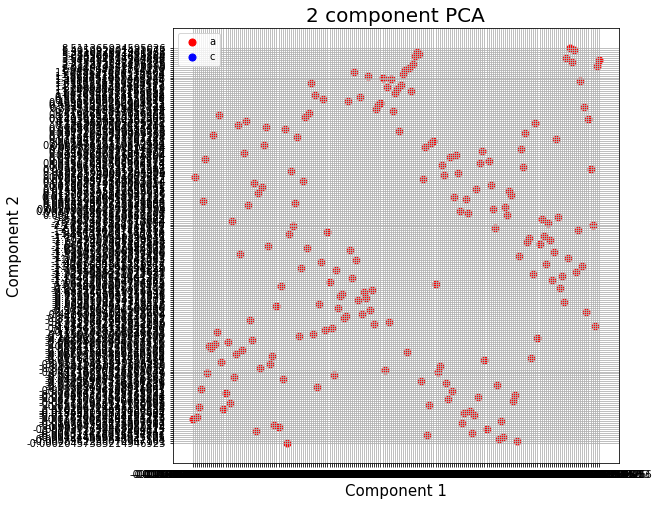

In [98]:
# Visualitzacio dels 2 components
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['a', 'c']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['alcoholic'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'component 1']
                ,finalDf.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()